##  ARIMA Models in Python | Seasonal ARIMA Models

### `01: Seasonal decompose`
You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

The milk production time series has been loaded in to the DataFrame milk_production and is available in your environment.

- Import the `seasonal_decompose()` function from `statsmodels.tsa.seasonal`.
- Decompose the `'pounds_per_cow'` column of `milk_production` using an additive model and period of 12 months.
- Plot the decomposition.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
milk_production = pd.read_csv("datasets/milk_production.csv", index_col='date', parse_dates=True)
milk_production

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


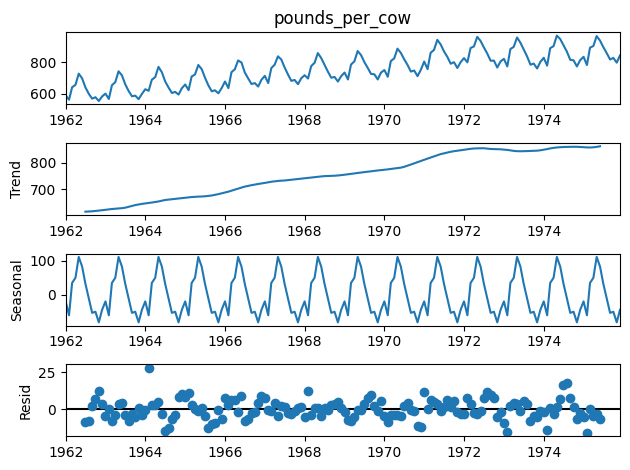

In [2]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

Udderly amazing work! You have extracted the seasonal cycle and now you can see the trend much more clearly.



### `02: Seasonal ACF and PACF`
Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

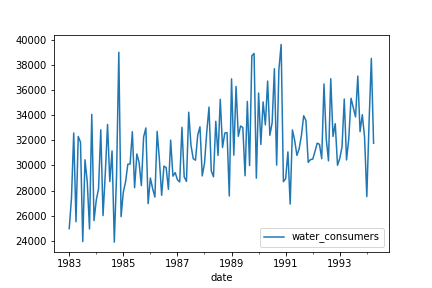

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

The `plot_acf()` function has been imported and the time series has been loaded in as `water`.

- Plot the ACF of the `'water_consumers'` column of the time series up to 25 lags.



In [3]:
water = pd.read_csv("datasets/water.csv", index_col='date', parse_dates=True)
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


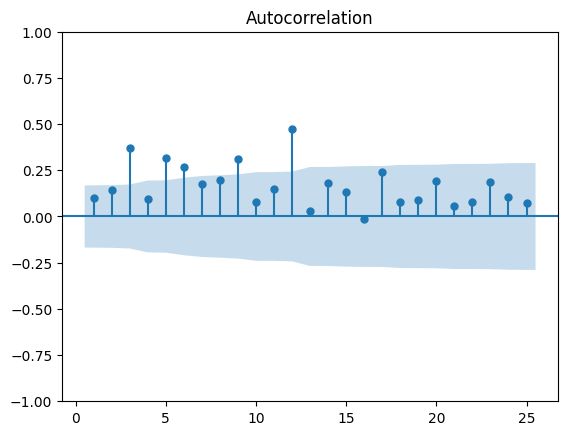

In [4]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

- Subtract a 15 step rolling mean from the original time series and assign this to `water_2`
- Drop the `NaN` values from `water_2`

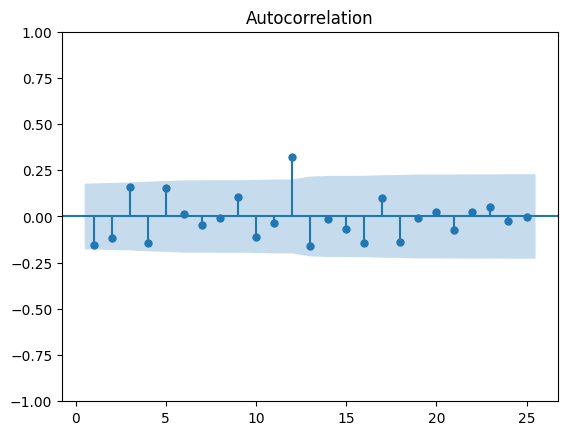

In [5]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

Question
What is the time period of the seasonal component of this data?

- 3 time steps 
- 9 time steps 
- 12 time steps ✅
- 15 time steps 
- None. There is no seasonal component 

💡 Great! Although you couldn't see it by looking at the time series itself, the ACF shows that there is an seasonal component and so including it will make your predictions better.



### `03: Fitting SARIMA models`
Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

The time series DataFrames `df1`, `df2` and `df3` are available in your environment.



In [6]:
df1= pd.read_csv("datasets/df1.csv", index_col=0, parse_dates=True)
df2= pd.read_csv("datasets/df2.csv", index_col=0, parse_dates=True)
df3=  pd.read_csv("datasets/df3.csv", index_col=0, parse_dates=True)

- Import the `SARIMAX` model class from `statsmodels.tsa.statespace.sarimax`.
- Create a SARIMAX(1,0,0)(1,1,0)7 model and fit it to df1.
- Print the model summary table.

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.180
Date:                           Wed, 10 May 2023   AIC                           1118.361
Time:                                   19:51:50   BIC                           1125.617
Sample:                               01-01-2013   HQIC                          1121.276
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1039      0.103      1.009      0.313      -0.098       0.306
ar.S.L7        0.2753      0.104      2.641

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


- Create a SARIMA(2,1,1)(1,0,0) model and fit it to `df2`.

In [8]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model =  SARIMAX(df2, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Wed, 10 May 2023   AIC                           1130.679
Time:                                    19:51:50   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110   

- Create a SARIMA(1,1,0)(0,1,1) model and fit it to `df3`.

In [9]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df3, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.375
Date:                              Wed, 10 May 2023   AIC                           1048.750
Time:                                      19:51:51   BIC                           1056.148
Sample:                                  01-01-2013   HQIC                          1051.729
                                       - 04-10-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.720      0.000       0.248       0.600
ma.S.L12      -0.08

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Great! You have now got to grips with the seasonal and non-seasonal model orders. Did you notice how the parameters for the seasonal and non-seasonal AR and MA coefficients are printed in the results table?

### `04: Choosing SARIMA order`
In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

| AR(p)	| MA(q)	| ARMA(p,q)|
| ----- | ----- | ---------|
|ACF	|Tails off	| Cuts off after lag q |	Tails off
|PACF	|Cuts off after lag p |	Tails off  |	Tails off


The DataFrame aus_employment and the functions `plot_acf()` and `plot_pacf()` are available in your environment.

Note that you can take multiple differences of a DataFrame using `df.diff(n1).diff(n2)`.

- Take the first order difference and the seasonal difference of the `aus_employment` and drop the `NaN` values. The seasonal period is 12 months.



In [10]:
aus_employment = pd.read_csv("datasets/aus_employment.csv", index_col=0,  parse_dates=True)
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


In [11]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff(1).diff(12).dropna()

- Plot the ACF and PACF of `aus_employment_diff` up to 11 lags.



c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


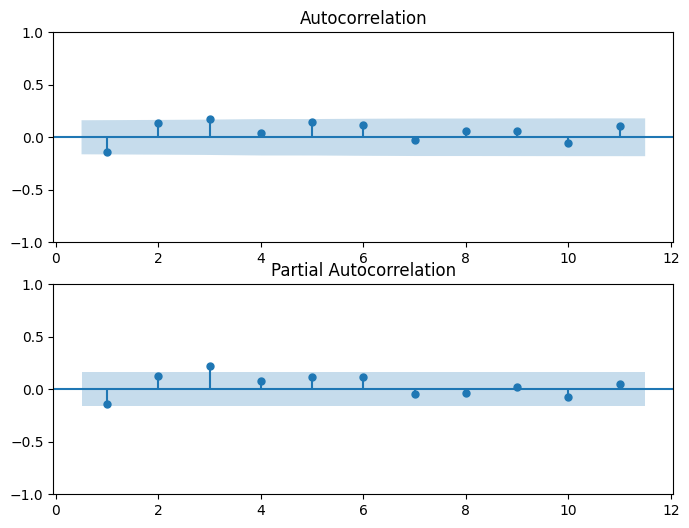

In [12]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)

plt.show()

- Make a list of the first 5 seasonal lags and assign the result to `lags`.
- Plot the ACF and PACF of `aus_employment_diff` for the first 5 seasonal lags.

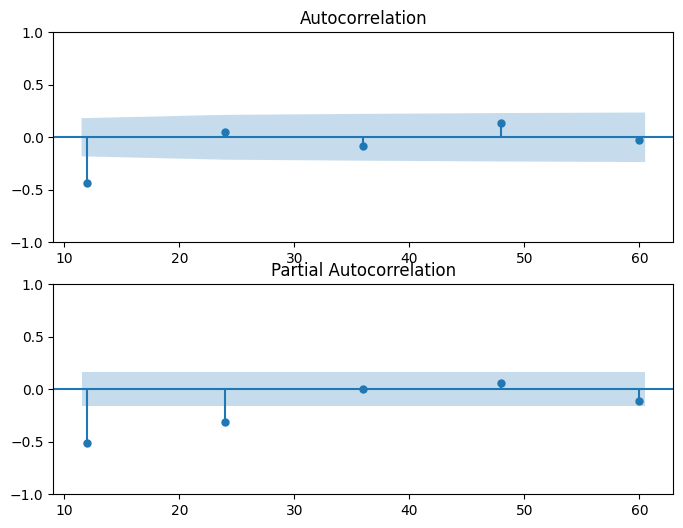

In [13]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, ax=ax2)

plt.show()

Question
Based on the ACF and PACF plots, which of these models is most likely for the data?
- SARIMAX(3,0,0)(0,0,1)12 
- SARIMAX(0,1,0)(0,1,1)12 ✅
- SARIMAX(3,1,0)(0,1,0)12 
- SARIMAX(0,1,0)(1,1,0)12
- SARIMAX(0,0,0)(0,1,1)4

Great! The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seasonal ACF and PACF look like an MA(1) model. We select the model that combines both of these.



### `05: SARIMA vs ARIMA forecasts`
In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)
, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

The fitted ARIMA results object and the fitted results object are available in your environment as arima_results and sarima_results.

- Create a forecast object, called `arima_pred`, for the ARIMA model to forecast the next 25 steps after the end of the training data.
- Extract the forecast `.predicted_mean` attribute from `arima_pred` and assign it to `arima_mean`.
- Repeat the above two steps for the SARIMA model.
- Plot the SARIMA and ARIMA forecasts and the held out data `wisconsin_test`.

In [14]:
wisconsin_test = pd.read_csv('./datasets/wisconsin_test.csv', index_col='date', parse_dates=True)
wisconsin_test = wisconsin_test.asfreq('MS')
dates = wisconsin_test.index
wisconsin_test.head()

,number_in_employment
date,
1973-10-01,374.5
1973-11-01,380.2
1973-12-01,384.6
1974-01-01,360.6
1974-02-01,354.4


In [15]:
model = SARIMAX(wisconsin_test, order=(3, 1, 2), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

arima_results = model.fit()

model = SARIMAX(wisconsin_test, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

sarima_results = model.fit()

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


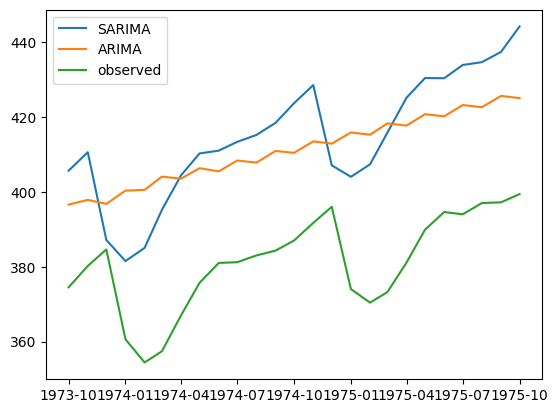

In [16]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

💡 Fantastic job! You can see that the SARIMA model has forecast the upward trend and the seasonal cycle, whilst the ARIMA model has only forecast the upward trend with an added wiggle. This makes the SARIMA forecast much closer to the truth for this seasonal data!



### `06: Automated model selection`
The `pmdarima` package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the `pmdarima` package to automatically choose model orders for some time series datasets.

Be careful when setting the model parameters, if you set them incorrectly your session may time out.

Three datasets are available in your environment as `df1`, `df2` and `df3`.

- Import the `pmdarima` package as `pm`.
- Model the time series `df1` with period 7 days and set first order seasonal differencing and no non-seasonal differencing.
- Create a model to fit `df2`. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.
- Fit a SARIMAX(p,1,q)(P,1,Q)7 model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.




In [18]:
# Import pmdarima as pm
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=1125.092, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.181, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.307, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.059, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.348, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1124.789, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1119.762, Time=0.27 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.631, Time=0.41 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1120.824, Time=0.22 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1118.936, Time=0.14 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.180, Time=0.12 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.670, Time=0.34 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1119.933, Time=0.17 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1119.777, Time=0.26 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept

In [19]:
# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False,
                      d=1,
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1131.956, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1153.963, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.355, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1155.747, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1153.963, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1136.103, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1130.992, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.020, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1132.526, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1130.992, Time=0.08 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 0.744 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(2, 1, 1)   Log Likelihood        

In [20]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1593.545, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1582.646, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1593.905, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1581.160, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1575.359, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,1,1)[7] intercept   : AIC=1577.281, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,1,1)[7]          
Total fit time: 2.029 seconds
                                      SARIMAX Results                                      
Dep. Variable:            

Well done! We use the information we already know about the time series to predefine some of the orders before we fit. Automating the choice of orders can speed us up, but it needs to be done with care.



### `07: Saving and updating models`
Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

The model is available in your environment as `model`.

- Import the `joblib` package and use it to save the model to `"candy_model.pkl"`.

In [21]:
# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model,filename)

['candy_model.pkl']

- Use the `joblib` package to load the model back in as `loaded_model`.

In [22]:
# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

- Update the loaded model with the data `df_new`.



In [30]:
# Update the model
# loaded_model.update(df_new)

Nice! You've just updated an old model with new measurements. This means it will make better prediction of the future. The next step might be to make new predictions with this model or save the updated version back to the file.

### `08: Multiplicative vs additive seasonality`
The first thing you need to decide is whether to apply transformations to the time series. In these last few exercises you will be working towards making a forecast of the CO
 time series. This and another time series for electricity production are plotted below.

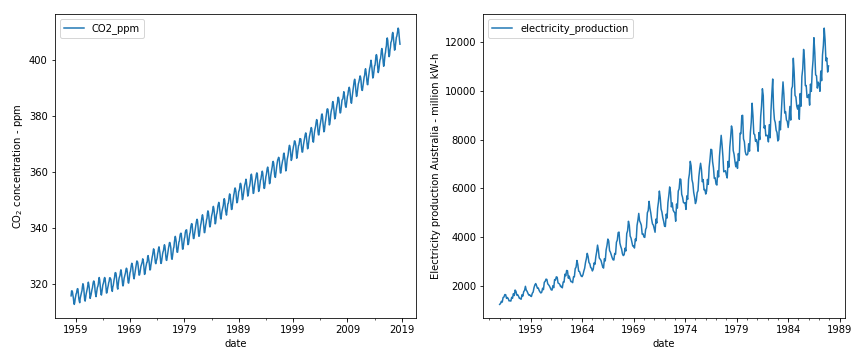

Which of the above time series, if either, should be log transformed?


- Left plot: CO concentration.
- Right plot: Electricity production. ✅
- None.
- Both.

💡 Great! Multiplicative seasonality is fairly common, and is important to be able to identify. You don't see it in the CO
 time series, so you won't apply the transform this time.



### `09: SARIMA model diagnostics`
Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a SARIMA(1, 1, 1)(0, 1, 1)
 model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

The `co2` DataFrame, and the `SARIMAX` model class are available in your environment.

- Fit a SARIMA(1, 1, 1)(0, 1, 1)12 model to the data.

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
co2 = pd.read_csv("datasets/co2_v2.csv", index_col=0, parse_dates=True)

# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
)
# Fit model
results = model.fit()

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### `9.2 Question`
In the console, print the summary of the results object you just created. Is there anything wrong with this model?
- the residuals are correlated 
- the residuals are not normally distibuted 
- both of the above     
- None of the above ✅

#### `9.3 Question`
- Create the common diagnostics plots for the results object.



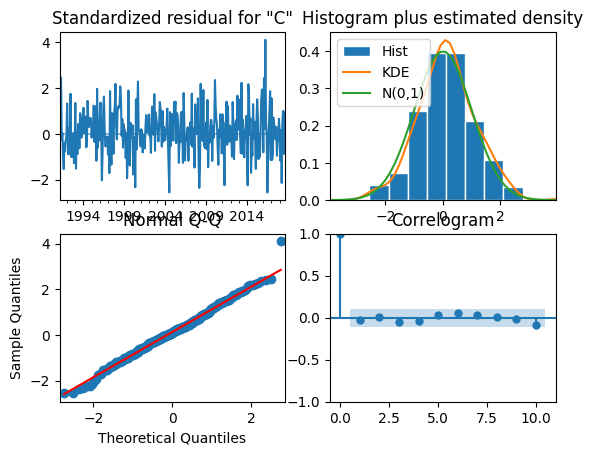

In [34]:
results.plot_diagnostics()
plt.show()

Perfect, the residuals look fine in these plots.



### `10: SARIMA forecast`
In the previous exercise you confirmed that a SARIMAx model was a good fit to the CO
 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO
 emissions or we will face major societal challenges.

In this exercise, you will forecast the CO
 time series up to the year 2030 to find the CO
 levels if we continue emitting as usual.

The trained model results object is available in your environment as results.

- Create a forecast object for the next 136 steps - the number of months until Jan 2030.
- Assign the `.predicted_mean` of the forecast to the variable `mean`.
- Compute the confidence intervals and assign this DataFrame to the variable `conf_int`.

In [35]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

- Plot the `mean` predictions against the `dates`.
- Shade the area between the values in the first two columns of DataFrame `conf_int` using `dates` as the x-axis values.

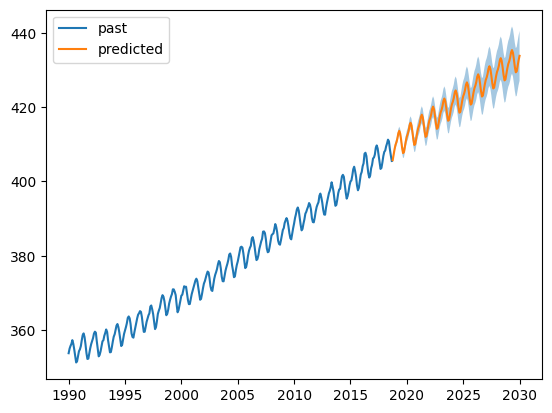

In [36]:
# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted');

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.loc[:, 'lower CO2_ppm'], 
                 conf_int.loc[:, 'upper CO2_ppm'], alpha=0.4);

# Plot legend and show figure
plt.legend()
plt.show()

- Print the final predicted `mean` of the forecast.
- Print the final row of the confidence interval `conf_int`.
- Remember to select the correct elements by using `.iloc[____]` on both.

In [37]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

433.7902836197622
lower CO2_ppm    427.078967
upper CO2_ppm    440.501600
Name: 2030-01-01 00:00:00, dtype: float64


💡 Great work! Your estimate says that CO2 will increase by roughly another 35ppm from October 2018 to January 2030. What do you think would happen if we lowered or raised our emission rates between now an then? How would our model perform if these dynamics changed?

